In [6]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02_unflipped_no_std/test_v2'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [7]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01_unflipped_no_std/tmp/dataset_dict_no_kahana_no_fx.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [8]:
tails = 'two_tail'
n_permutations = 100
method = 'spearman'
fwe = False
datasets_to_flip = [] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [9]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 100/100 [03:55<00:00,  2.35s/it]

Calculating two-tailed p-values
0.2891918792227883 [0.31044819 0.22129294 0.20591606 0.27627561 0.22787106 0.21241328
 0.24941847 0.19696132 0.27625643 0.26395474 0.24364697 0.38135224
 0.20683834 0.23777615 0.24677894 0.26449887 0.27202262 0.23002722
 0.15895461 0.16355351 0.21377435 0.30175252 0.18688193 0.21807801
 0.24842665 0.17242868 0.24164392 0.1754092  0.23604062 0.23007697
 0.20652792 0.23015336 0.23078129 0.26055841 0.24411376 0.20611148
 0.21034561 0.2489934  0.28072469 0.19344635 0.21289043 0.2247631
 0.19985942 0.15969681 0.23543226 0.27491603 0.23447172 0.20238902
 0.24500691 0.22943408 0.33024219 0.24310215 0.2364103  0.26051439
 0.2239313  0.28149798 0.1919353  0.21557327 0.22100592 0.28164591
 0.2416693  0.1985655  0.22309372 0.2477235  0.24822205 0.2453289
 0.23403032 0.27471161 0.23441151 0.26556146 0.19347866 0.29096542
 0.15507303 0.21445601 0.2148458  0.24927083 0.20311092 0.19779241
 0.19010487 0.24548769 0.24732262 0.1994915  0.26471633 0.21707906
 0.22669219 0

# 02 - Visualize Results

Similarity matrix (Signs Included)

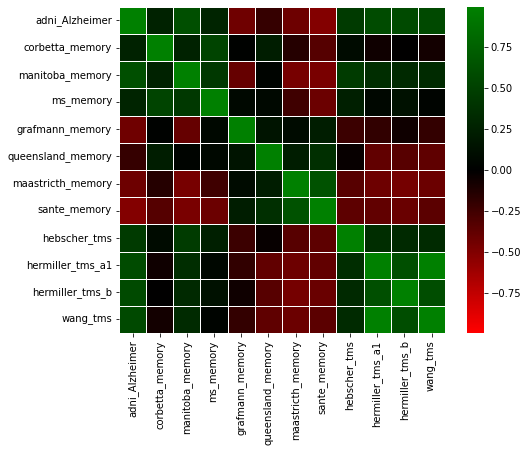

In [10]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

View the Overall Similarities of the Topology, Signs Aside

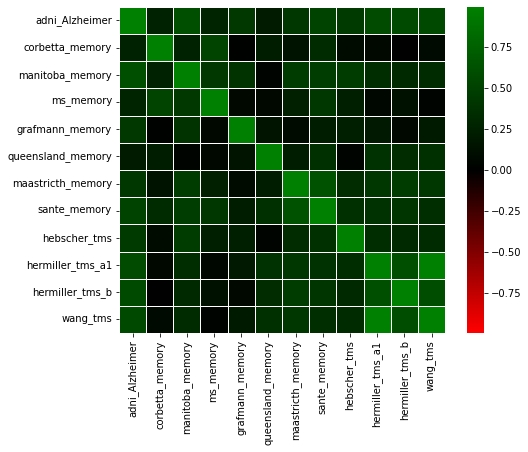

In [11]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='similarity', output_path=out_dir+'/heatmap_similarity_absval.svg')

Permuted Similarity

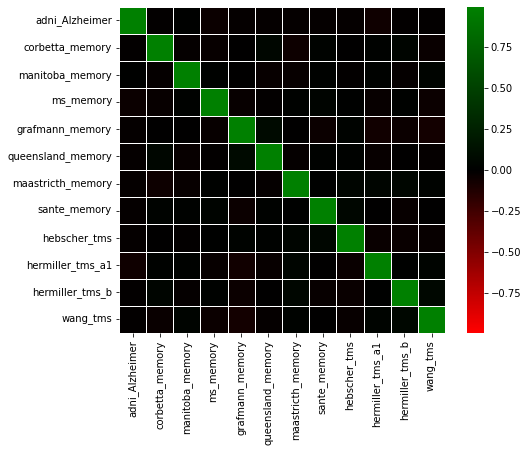

In [12]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit)

Pairwise P values Matrix

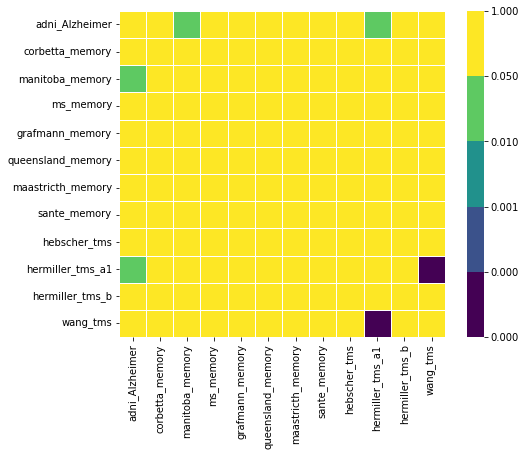

In [13]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

That's all
- calvin